<a href="https://colab.research.google.com/github/park-jiha/deep-learning/blob/main/%EC%BA%90%EA%B8%80_%EB%94%B0%EB%A6%89%EC%9D%B4%20%EC%82%AC%EC%9A%A9%EC%9E%90%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
train_data = pd.read_csv("2020.AI.bike-train.csv")
train_data.sample(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
993,1641,23,9.9,0.0,3.3,69.0,1974.0,0.037,45.0,17.0,70.0
859,1435,4,15.3,0.0,0.4,78.0,1196.0,0.035,22.0,18.0,2.0
298,503,15,13.4,1.0,3.7,62.0,969.0,0.043,43.0,35.0,2.0
553,920,16,23.9,0.0,6.0,22.0,2000.0,0.058,40.0,14.0,137.0
672,1125,11,12.5,0.0,1.6,44.0,1725.0,0.011,91.0,30.0,64.0
971,1601,11,22.7,0.0,2.9,38.0,1967.0,0.043,26.0,20.0,111.0
27,49,2,8.9,0.0,0.9,52.0,839.0,0.011,80.0,71.0,10.0
231,389,4,16.1,0.0,0.6,45.0,1968.0,0.036,47.0,26.0,13.0
306,513,14,13.2,1.0,4.7,81.0,604.0,0.053,52.0,19.0,27.0
706,1182,21,16.6,0.0,1.7,64.0,2000.0,0.031,30.0,17.0,192.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1000 non-null   int64  
 1   hour                    1000 non-null   int64  
 2   hour_bef_temperature    1000 non-null   float64
 3   hour_bef_precipitation  1000 non-null   float64
 4   hour_bef_windspeed      1000 non-null   float64
 5   hour_bef_humidity       1000 non-null   float64
 6   hour_bef_visibility     1000 non-null   float64
 7   hour_bef_ozone          1000 non-null   float64
 8   hour_bef_pm10           1000 non-null   float64
 9   hour_bef_pm2.5          1000 non-null   float64
 10  count                   1000 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 86.1 KB


In [ ]:
num_of_null = train_data.isnull().sum()
percent = (train_data.isnull().sum() / train_data.isnull().count() * 100)
pd.concat([num_of_null, percent], axis=1, keys=['# of null', 'Percent']).sort_values(by='Percent', ascending=False)

,# of null,Percent
id,0,0.0
hour,0,0.0
hour_bef_temperature,0,0.0
hour_bef_precipitation,0,0.0
hour_bef_windspeed,0,0.0
hour_bef_humidity,0,0.0
hour_bef_visibility,0,0.0
hour_bef_ozone,0,0.0
hour_bef_pm10,0,0.0
hour_bef_pm2.5,0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

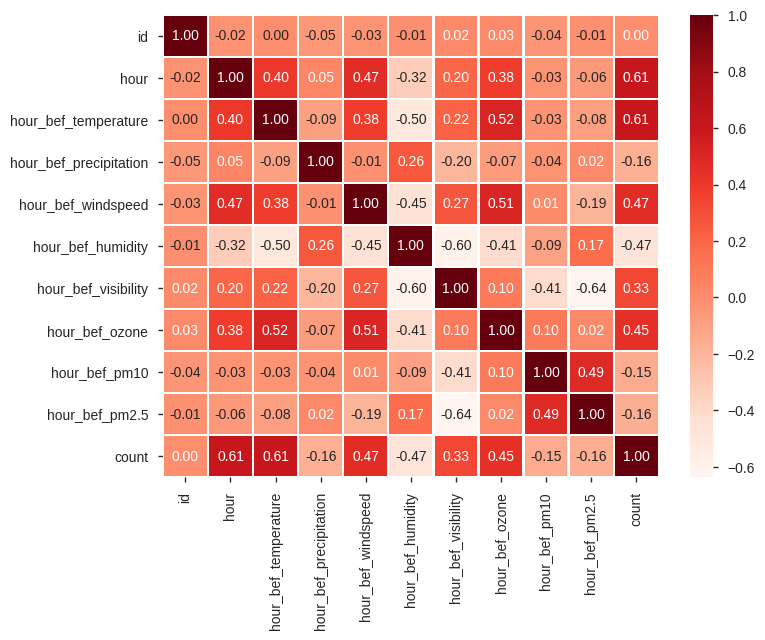

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', linewidths=1, cmap='Reds')

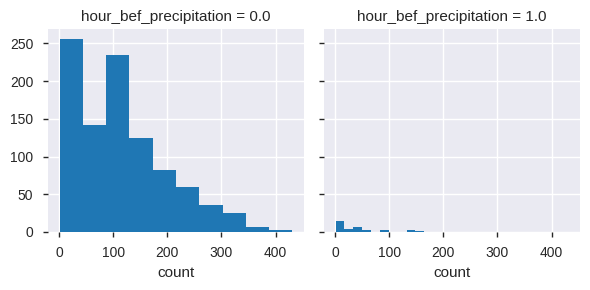

In [ ]:
grid = sns.FacetGrid(train_data, col='hour_bef_precipitation')
grid.map(plt.hist, 'count', bins=10)
plt.show()

In [ ]:
train_data = train_data.drop('hour_bef_precipitation', axis=1)
#train_data = train_data.drop('hour_bef_humidity', axis=1)

In [ ]:
x_data = train_data.iloc[:,:-1]
y_data = train_data.iloc[:,-1]

x_data

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...
995,1647,14,20.4,3.6,12.0,2000.0,0.047,23.0,13.0
996,1649,15,18.5,4.1,24.0,849.0,0.064,92.0,83.0
997,1650,4,16.1,0.6,60.0,2000.0,0.028,39.0,28.0
998,1652,16,17.7,2.3,32.0,1949.0,0.037,64.0,22.0


In [ ]:
y_data

0       49.0
1      159.0
2       26.0
3       57.0
4      431.0
       ...  
995    108.0
996     78.0
997     27.0
998    118.0
999      5.0
Name: count, Length: 1000, dtype: float64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(30,input_dim = 9,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

optim = optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = optim,loss='mean_squared_error',metrics=['mse'])

In [ ]:
model.fit(x_data,y_data,epochs=100,batch_size=10)

Epoch 1/100
100/100 [==============================] - 1s 1ms/step - loss: 7564.9753 - mse: 7564.9753
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 6195.2097 - mse: 6195.2097
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 6563.2011 - mse: 6563.2011
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 6193.8359 - mse: 6193.8359
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 5681.8332 - mse: 5681.8332
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 5402.4222 - mse: 5402.4221
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 3948.1058 - mse: 3948.1058
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 3721.6653 - mse: 3721.6653
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 3754.5176 - mse: 3754.5174
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 3830.3

In [ ]:
test_data = pd.read_csv("2020.AI.bike-test.csv")
test_data

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,1655,4,14.6,0.0,0.6,49.0,2000.0,0.014,41.0,27.0
1,1657,20,21.8,0.0,4.4,40.0,2000.0,0.048,35.0,19.0
2,1660,22,18.3,0.0,1.0,37.0,970.0,0.032,169.0,38.0
3,1662,7,13.2,0.0,0.6,85.0,431.0,0.023,50.0,39.0
4,1663,8,8.9,0.0,0.9,77.0,613.0,0.005,82.0,40.0
...,...,...,...,...,...,...,...,...,...,...
322,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0
323,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0
324,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0
325,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0


In [ ]:
test_data = test_data.drop('hour_bef_precipitation', axis=1)
#test_data = test_data.drop('hour_bef_humidity', axis=1)

In [ ]:
test_data

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,1655,4,14.6,0.6,49.0,2000.0,0.014,41.0,27.0
1,1657,20,21.8,4.4,40.0,2000.0,0.048,35.0,19.0
2,1660,22,18.3,1.0,37.0,970.0,0.032,169.0,38.0
3,1662,7,13.2,0.6,85.0,431.0,0.023,50.0,39.0
4,1663,8,8.9,0.9,77.0,613.0,0.005,82.0,40.0
...,...,...,...,...,...,...,...,...,...
322,2174,4,16.8,1.6,53.0,2000.0,0.031,37.0,27.0
323,2175,3,10.8,3.8,45.0,2000.0,0.039,34.0,19.0
324,2176,5,18.3,1.9,54.0,2000.0,0.009,30.0,21.0
325,2178,21,20.7,3.7,37.0,1395.0,0.082,71.0,36.0


In [ ]:
y_test = model.predict(test_data).flatten()

y_test

array([ 53.472313 , 225.20418  , 125.24046  ,  26.289251 ,  27.784126 ,
       240.622    ,  55.73586  , 175.95528  , 125.82726  , 162.51785  ,
         5.492415 , 165.16704  ,  28.39642  ,   6.1962643, 179.00552  ,
       134.31277  , 133.72754  , 241.8086   , 128.05934  , 151.65466  ,
       206.45755  , 204.0717   ,  30.43563  , 177.40588  , 203.0103   ,
        41.26862  , 188.85217  , 176.20937  , 173.16298  , 189.4197   ,
        21.00082  ,  61.441418 , 144.52765  , 185.05586  , 187.6983   ,
       214.77618  , 131.71646  , 155.12047  , 145.49242  , 172.84126  ,
        24.545021 , 170.85205  , 152.83568  , 178.37415  , 197.83865  ,
       206.18077  ,   8.385828 ,  49.51462  ,  70.43262  ,  42.780605 ,
       215.60316  , 179.41252  ,  15.439404 , 156.72485  , 193.6775   ,
        29.40569  , 202.53653  ,  98.84304  , 177.02213  , 205.4664   ,
       159.7539   , 162.46495  , 131.81943  , 140.26704  ,  50.18988  ,
       155.56444  , 225.78319  , 220.64182  ,  49.908237 ,  60.5

In [ ]:
result = pd.DataFrame({'id':range(0,327),'count':y_test})
result

,id,count
0,0,53.472313
1,1,225.204178
2,2,125.240463
3,3,26.289251
4,4,27.784126
...,...,...
322,322,72.467690
323,323,62.031788
324,324,88.412720
325,325,208.510590


In [ ]:
result.to_csv("result_data.csv", index=False, header=True)